<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/_03__regression_gd_visu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La régression linéaire : visualisation de la descente de gradient

## Données
On commence par générer des données. Les données en entrée seront dans $\mathbb{R}$, et pour chaque point $x_i \in \mathbb{R}$, il faudra prédire un $y_i \in \mathbb{R}$.

In [ ]:
import numpy as np
nb_points = 30
true_w = -.8
true_b = .5
data_x = np.random.rand(nb_points, 1)
data_y = data_x * true_w + true_b + np.random.randn(nb_points, 1) * .1

In [ ]:
#EQM
def eqm(w, b):
  return ((w * data_x + b - data_y) ** 2).mean()

# calcul du modèle minimisant l'EQM
z = np.hstack([np.ones((nb_points, 1)), data_x])
theta_opt = np.linalg.solve(z.T @ z, z.T @ data_y)
b_opt, w_opt = theta_opt[0], theta_opt[1]

# gradient
def grad(w, b):
  return 2 * ((w * data_x + b - data_y) * data_x).mean(), \
         2 * (w * data_x + b - data_y).mean()

print('EQM optimale :', eqm(w_opt, b_opt))

EQM optimale : 0.008566195867854435


## Visualisation de l'espace d'optimisation


In [ ]:
dist = np.random.randn()
w0 = w_opt[0] + dist
b0 = b_opt[0] + dist

In [ ]:
alpha = .2

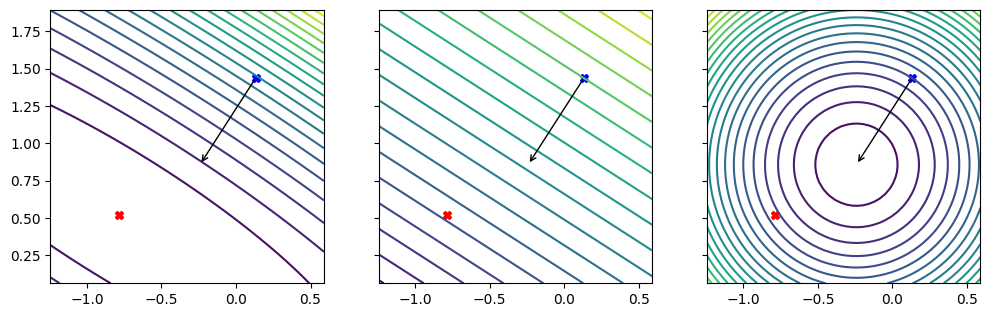

In [ ]:
import matplotlib.pyplot as plt

wmax, wmin, bmax, bmin = max(w_opt, w0), min(w_opt, w0), max(b_opt, b0), min(b_opt, b0)
nppd = 50
lx, ly = wmax - wmin, bmax - bmin
x = np.linspace(wmin - lx / 2, wmax + lx / 2, nppd)
y = np.linspace(bmin - ly / 2, bmax + ly / 2, nppd)
XM, YM = np.meshgrid(x, y)

def plot_step(w, b):
  fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(12, 20))
  for ax in axs:
    ax.set_aspect('equal')
  dtheta = np.asarray(grad(w, b))

  def loss(xk, yk):
    return eqm(xk, yk)

  def grad_map(xk, yk):
    return np.dot(dtheta, [xk - w, yk - b])

  def grad_map_n_penal(xk, yk):
    return np.dot(dtheta, [xk - w, yk - b]) + 1 / 2 / alpha * ((xk - w)**2 + (yk - b)**2)

  plot_fcts = [loss, grad_map, grad_map_n_penal]

  for ax, f in zip(axs, plot_fcts):
    ax.plot(w_opt, b_opt, 'Xr')
    ax.plot(w, b, 'Xb')
    fz = np.asarray([f(xk, yk) for xk, yk in zip(XM.reshape(-1), YM.reshape(-1))]).reshape(nppd, nppd)
    ax.contour(XM, YM, fz, levels=20)
    ax.annotate("", xytext=(w, b), xy=(w - alpha * dtheta[0], b - alpha * dtheta[1]),
                arrowprops=dict(arrowstyle='->'))
  plt.show()


plot_step(w0, b0)

# Exercices

## 1.
Implémenter la descente de gradient pour minimiser l'EQM et afficher à chaque itération les trois figures précédentes en appelant `plot_step`.


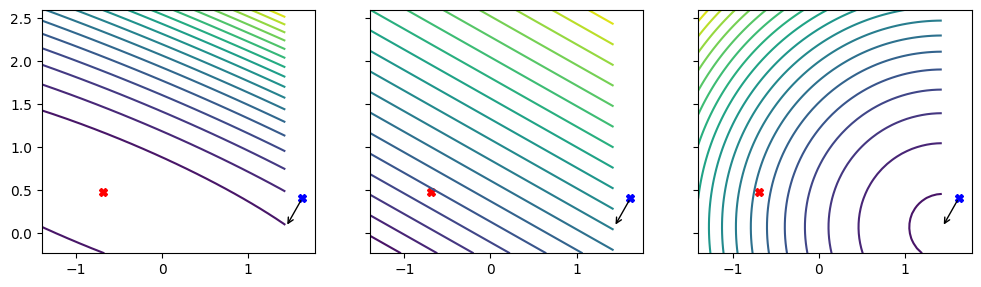

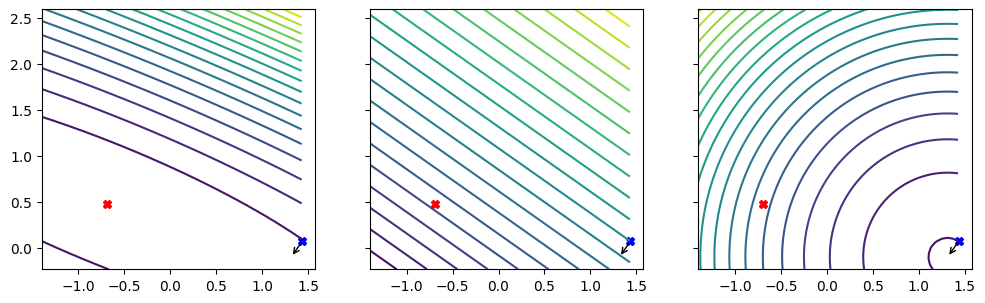

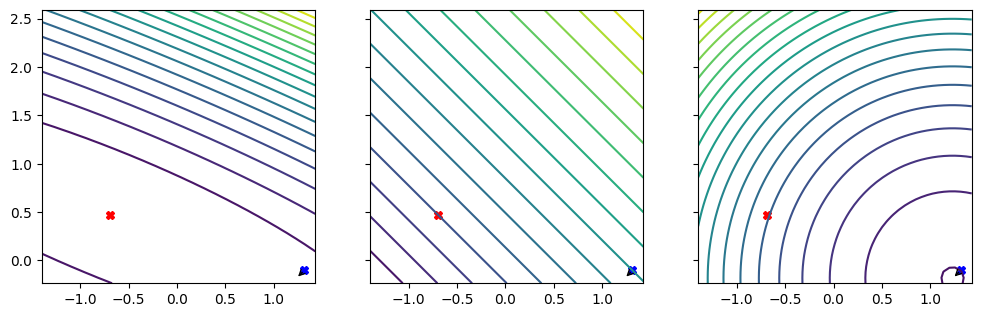

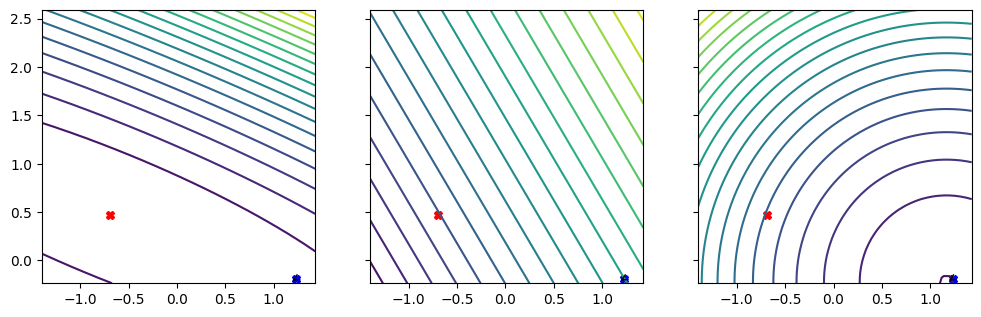

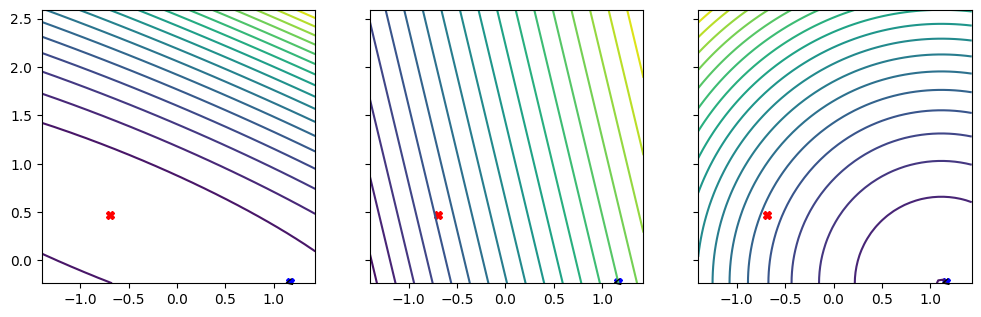

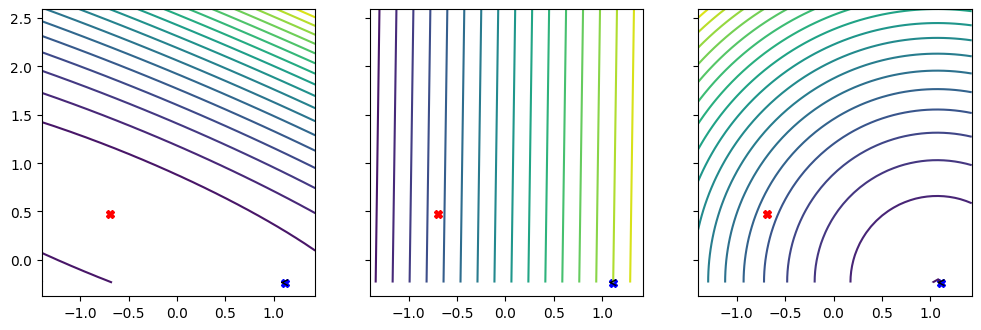

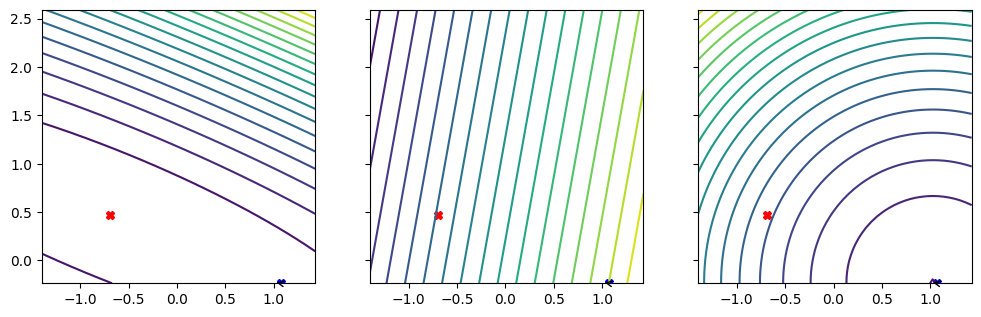

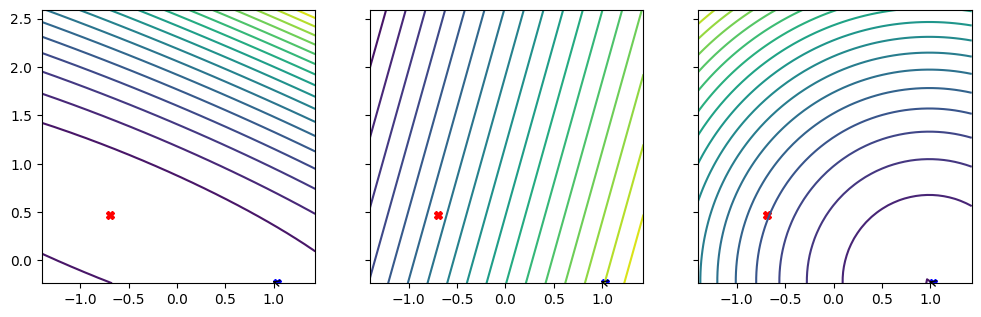

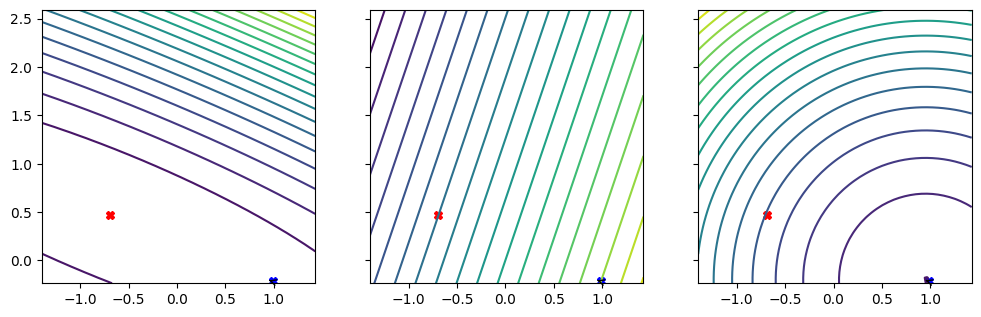

In [ ]:
alpha = 0.2
liste_des_w_t = []
liste_des_b_t = []
w = np.random.randn()
b = np.random.randn()
for i in range(500):
  Dw = 0
  Db = 0
  for k in range(nb_points):
    Dw += 2*data_x[k]*((np.dot(w,data_x[k])+b)-data_y[k])
    Db += 2*((np.dot(w,data_x[k])+b)-data_y[k])
  Dw = Dw/nb_points
  Db = Db/nb_points
  w = w - alpha*Dw
  b = b - alpha*Db
  liste_des_b_t.append(b)
  liste_des_w_t.append(w)
  plot_step(w,b)

## 2.
Garder un historique des paramètres à chaque pas de temps de la descente de gradient et afficher une trace de tous ces points à la fin de l'optimisation en utilisant `plt.plot(liste_des_w_t, liste_des_b_t)`.

Qu'observez-vous? Est-ce que utiliser un plus grand $\alpha$ permet de résoudre le problème?